In [1]:
import pandas as pd
import numpy as np
import matplotlib
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
# Dealing with datetime features
from datetime import *

# Timer
import time

#### Reading the files 

### Please note that this file does not contain the labels derived from clustering of grievance corpus 
### This is an atempt to learn the model results by removing the greivance comments and combining the aggregated labels of outstanding , satisfactory and deficient from the train.csv file 

In [2]:
data = pd.read_csv("GrievancesData_Train.csv", sep=",",header='infer')

In [3]:
#This function computes the percentage of missing data per header name for a sub-frame of the CCD.
def missing_number(dataframe, header_name):
    count = 0
    for x in dataframe[header_name]:
        try:
            if np.isnan(x):
                count+=1
        except TypeError:
            pass
    return (count)



#This function counts unique elements in columns
def count_unique(dataframe, header_name):
    z = dataframe[header_name].unique()
    return sum(1 for v in z if pd.notnull(v))

In [4]:
r = []
for col in data.columns:
    r.append([col, missing_number(data,col),count_unique(data,col)])
missing_data = pd.DataFrame(r, columns=['Column Name', 'Missing Val', 'Unique'])
print(missing_data)

             Column Name  Missing Val  Unique
0            GrievanceID            0   53680
1                 BankID            0      86
2                  State          121      59
3        DateOfGrievance            0    1222
4     Grievance_Category            0      67
5   GrievanceDescription            0   46662
6         LineOfBusiness            0       4
7     ResolutionComments            0       4
8               Disputed            0       2
9       DateOfResolution            0    1248
10             BankGrade            0       3


In [5]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [6]:
data_set = data

In [7]:
## Only interested in subset of data without consumer complaints
##Taking subset of the data

df = data_set[['GrievanceID','BankID','State','DateOfGrievance','Grievance_Category','LineOfBusiness','ResolutionComments','Disputed','DateOfResolution','BankGrade']]

In [8]:
#Type casting
df['DateOfGrievance'] = pd.to_datetime(df['DateOfGrievance'], format='%m/%d/%Y')
df['DateOfResolution'] = pd.to_datetime(df['DateOfResolution'], format='%m/%d/%Y')


In [9]:
from datetime import timedelta

df['Processing_time'] = df['DateOfResolution']-df['DateOfGrievance']
df.loc[df['Processing_time']<timedelta(days=0),'DateOfResolution'] = df['DateOfGrievance']

In [10]:
df['Year'] = pd.to_datetime(df['DateOfGrievance'], format = '%d%b%Y')
df['Year']= df['Year'].dt.year

In [11]:
df['Processing_time'] = df['Processing_time'].astype('timedelta64[D]').astype(int)

In [12]:
label = pd.DataFrame(df.BankGrade.value_counts())
label.columns = ['BankGrade_cnt']
label['Bankrating'] = label.BankGrade_cnt/df.shape[0]

base = 0.972434

label

BankGrade_cnt  Bankrating
satisfactory          34881    0.649795
deficient             14304    0.266468
outstanding            4495    0.083737

In [13]:
df.BankGrade[df.BankGrade == 'deficient'] = 0
df.BankGrade[df.BankGrade == 'satisfactory'] = 1
df.BankGrade[df.BankGrade == 'outstanding'] = 2

df.BankGrade = df.BankGrade.astype('int')

Text(0.5,0,'Num_of_Grievances')

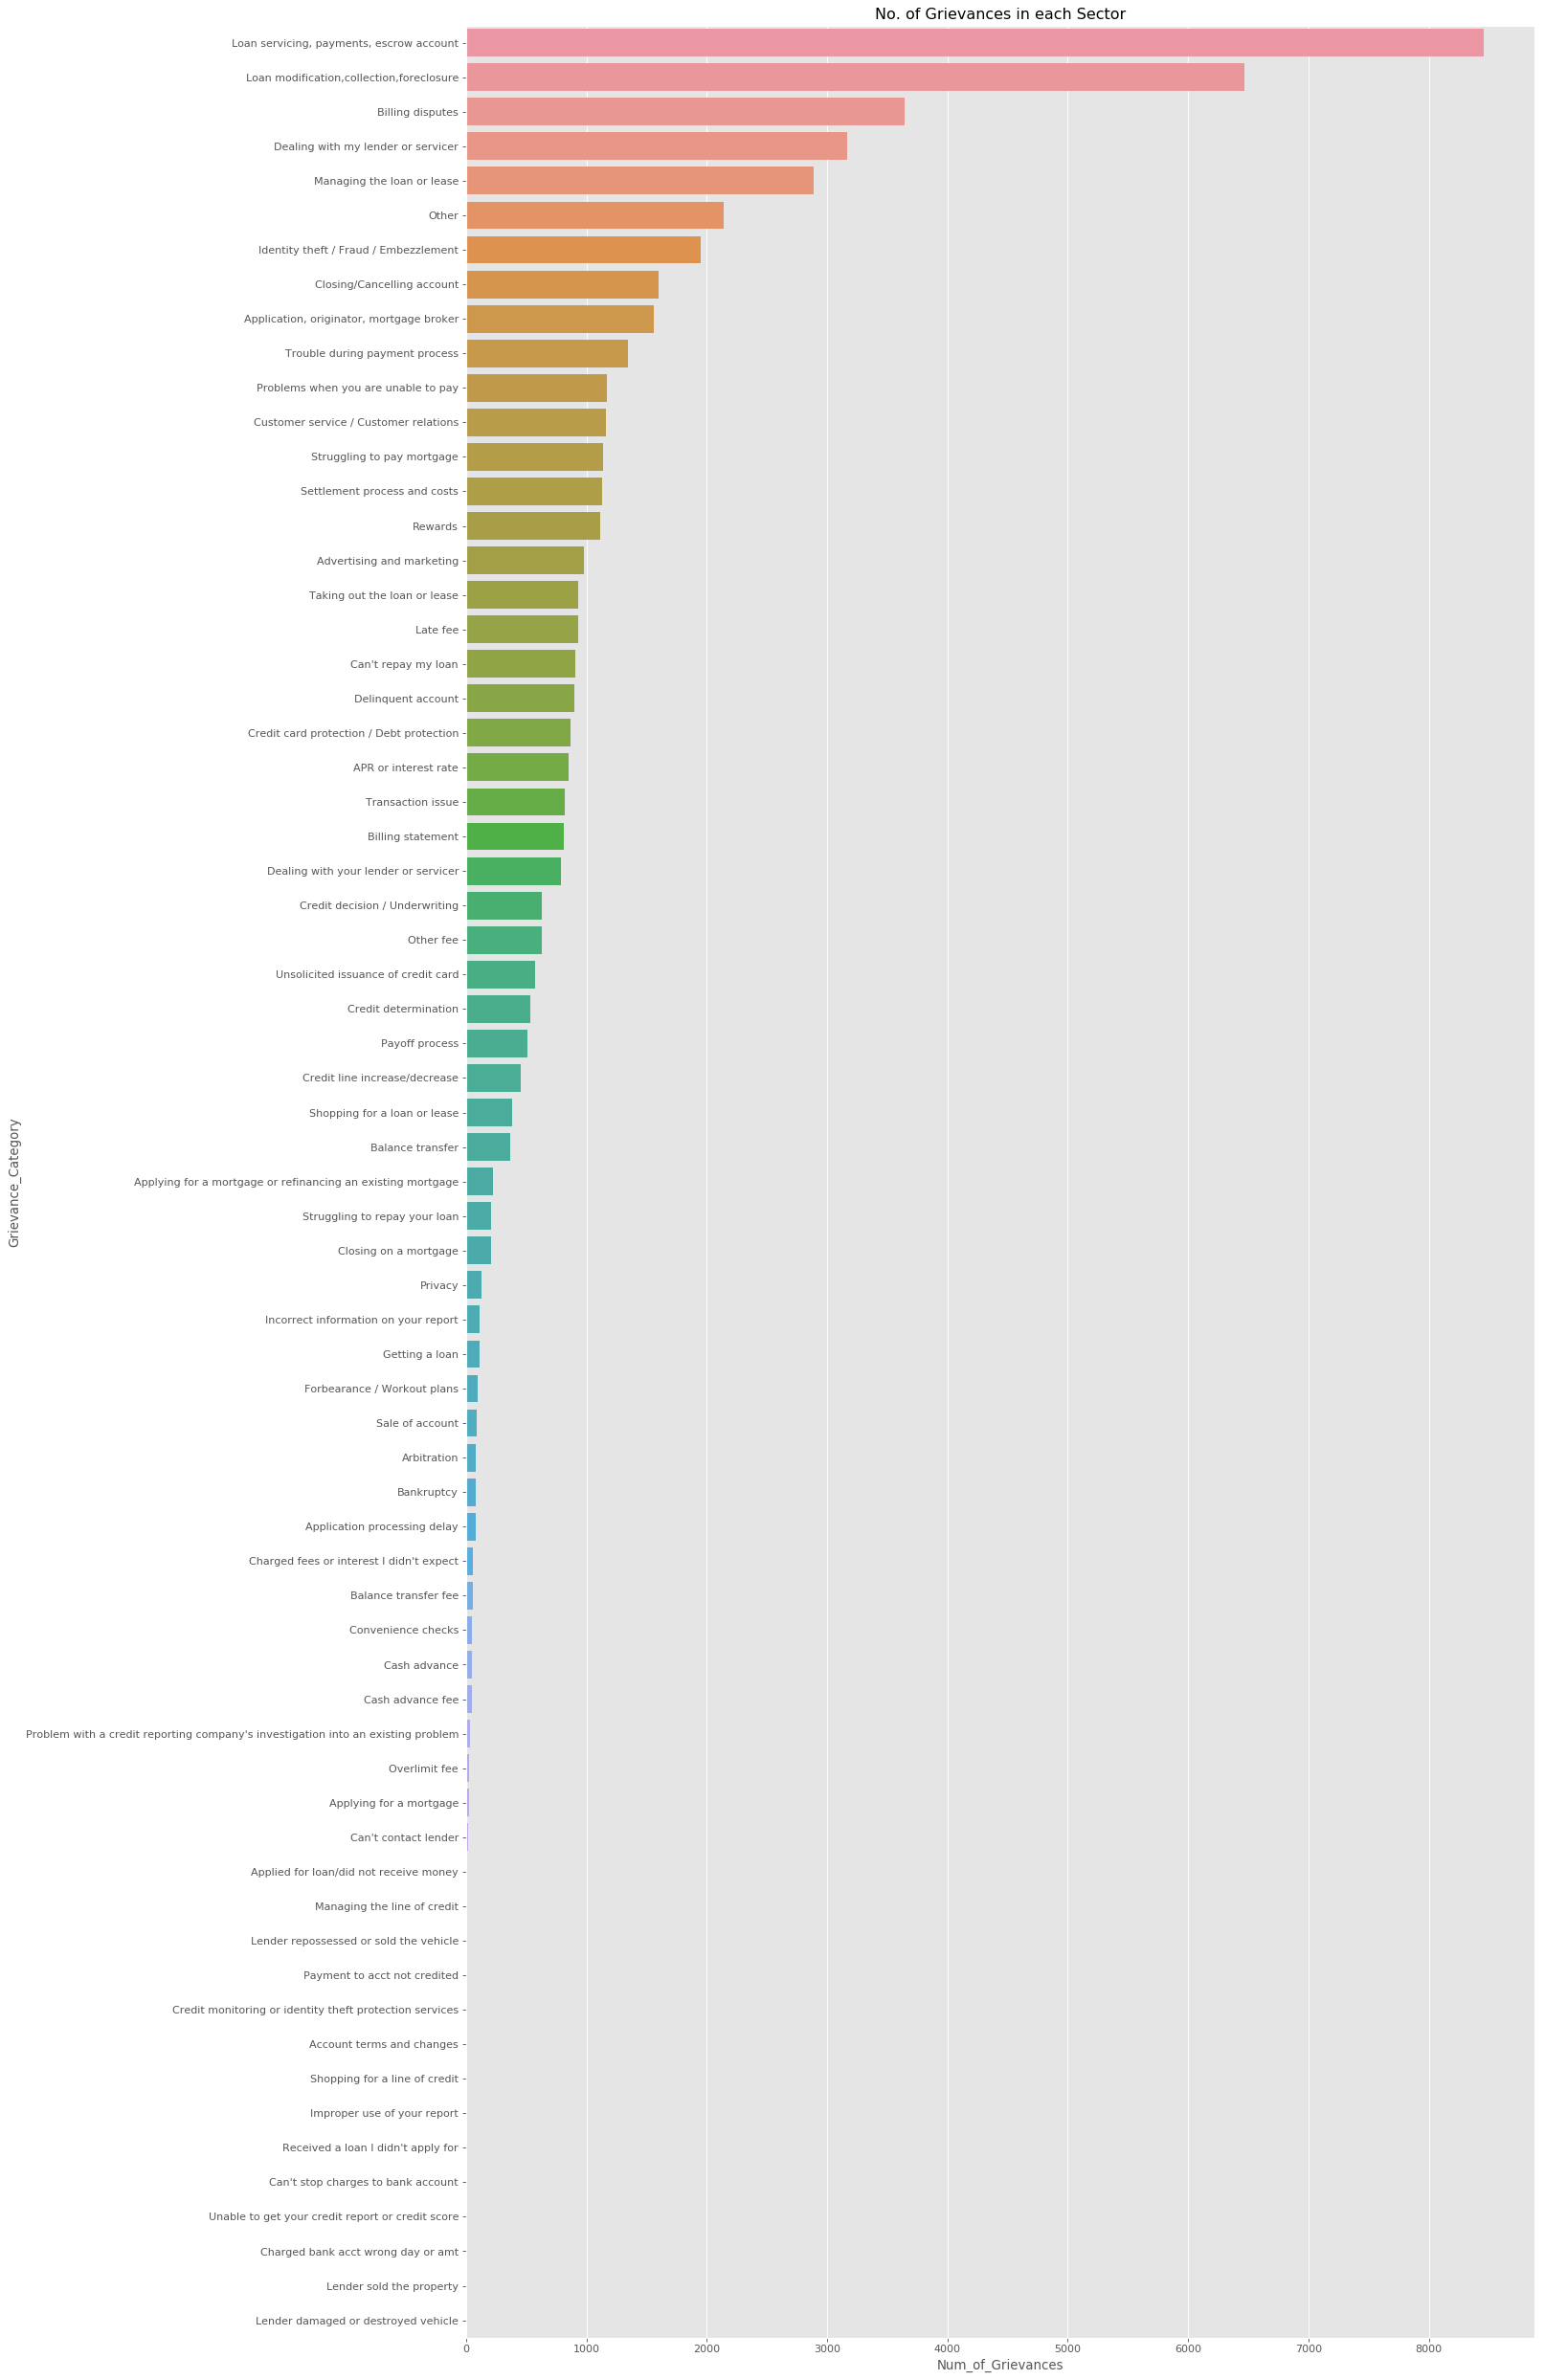

In [75]:
fig=plt.figure(figsize=(18, 40), dpi= 80, facecolor='w', edgecolor='k')
count_plot = sns.countplot(y = df['Grievance_Category'],order=df['Grievance_Category'].value_counts().index)
count_plot.set_ylabel('Grievance_Category')
count_plot.set_title('No. of Grievances in each Sector')
plt.xlabel('Num_of_Grievances')


# Exp

In [14]:
def freq_by_cat(data, cat):
    '''
    Input: data is the whole data set;
           cat is the categorical feature you want to calculate the frequency of each category inside this feature.
    Output: a dataframe
    '''
    
    cat = str(cat)
    # Calculate the frequency of each cat
    freq = data.groupby('%s'%cat).count()/53680
    # reset index
    freq['%s'%cat] = freq.index
    freq.columns = ['freq_by_%s'%cat, '%s'%cat]
    freq = freq.reset_index(drop=True)
    
    return freq

In [15]:
df

GrievanceID    BankID    State DateOfGrievance  \
0       GID512411  Bank5279  State31      2016-01-19   
1       GID512412  Bank5287  State26      2016-01-19   
2       GID512413  Bank5286  State14      2016-01-19   
3       GID512415  Bank5279  State53      2016-01-19   
4       GID512417  Bank5286  State37      2016-01-19   
5       GID512418  Bank5237  State16      2016-01-19   
6       GID512419  Bank5257  State16      2016-01-19   
7       GID515122  Bank5397  State27      2016-03-19   
8       GID512421  Bank5382  State14      2016-01-19   
9       GID515125  Bank5422  State39      2016-03-19   
10      GID512422  Bank5428  State40      2016-01-19   
11      GID512423  Bank5451   State3      2016-01-19   
12      GID512424  Bank5257  State46      2016-01-19   
13      GID512425  Bank5286   State9      2016-01-19   
14      GID512427  Bank5421   State9      2016-01-19   
15      GID512431  Bank5415   State9      2016-01-19   
16      GID512432  Bank5245   State9      2016-01-19   
17      GID512434  Bank5257  State42      2016-01-19   
18      GID515126  Bank5421  State40      2016-03-19   
19      GID512435  Bank5440  State52      2016-01-19   
20      GID512436  Bank5254  State50      2016-01-19   
21      GID512440  Bank5257  State40      2016-01-19   
22      GID514111  Bank5286  State14      2016-02-19   
23      GID512441  Bank5286  State27      2016-01-19   
24      GID515128  Bank5279   State9      2016-03-19   
25      GID512442  Bank5257  State14      2016-01-19   
26      GID512443  Bank5425  State16      2016-01-19   
27      GID515131  Bank5286  State47      2016-03-19   
28      GID512444  Bank5251  State14      2016-01-19   
29      GID512445  Bank5426   State9      2016-01-19   
...           ...       ...      ...             ...   
53650   GID502146  Bank5454  State53      2015-08-01   
53651   GID502147  Bank5359  State53      2015-08-01   
53652   GID502160  Bank5436  State36      2015-08-02   
53653   GID502164  Bank5451   State9      2015-08-02   
53654   GID502170  Bank5338  State47      2015-08-04   
53655   GID502177  Bank5421   State9      2015-08-05   
53656   GID502178  Bank5338  State14      2015-08-05   
53657   GID502179  Bank5425  State14      2015-08-05   
53658   GID502185  Bank5421  State40      2015-08-06   
53659   GID502186  Bank5359   State9      2015-08-06   
53660   GID502193  Bank5257  State53      2015-08-07   
53661   GID502196  Bank5426  State53      2015-08-07   
53662   GID502211  Bank5359  State32      2015-08-09   
53663   GID502231  Bank5286   State4      2015-08-13   
53664   GID502237  Bank5421   State9      2015-08-13   
53665   GID502250  Bank5454  State24      2015-08-14   
53666   GID502251  Bank5454  State59      2015-08-15   
53667   GID502262  Bank5342   State8      2015-08-16   
53668   GID502263  Bank5257  State53      2015-08-16   
53669   GID502269  Bank5257  State32      2015-08-16   
53670   GID502276  Bank5262  State14      2015-08-16   
53671   GID502281  Bank5338  State21      2015-08-17   
53672   GID502294  Bank5359  State45      2015-08-18   
53673   GID502302  Bank5257  State30      2015-08-20   
53674   GID502347  Bank5262  State22      2015-08-22   
53675   GID502352  Bank5421  State44      2015-08-22   
53676   GID502359  Bank5338  State45      2015-08-22   
53677   GID502390  Bank5262   State6      2015-08-23   
53678   GID502396  Bank5338  State53      2015-08-23   
53679   GID502400  Bank5338  State59      2015-08-24   

                                      Grievance_Category LineOfBusiness  \
0                           Settlement process and costs       Mortgage   
1               Application, originator, mortgage broker       Mortgage   
2                                       Billing disputes    Credit card   
3               Loan servicing, payments, escrow account       Mortgage   
4               Loan modification,collection,foreclosure       Mortgage   
5                     Dealing with my lender or servicer   Student loan   
6       

** Issue **

New features:

- freq_by_issue: Frequency of issue

In [16]:
Issue = df[['Grievance_Category', 'BankGrade']]
freq_by_issue = freq_by_cat(Issue, 'Grievance_Category')
#freq_by_issue

In [17]:
# One new feature: freq_by_issue
df = pd.merge(df, freq_by_issue, on='Grievance_Category')

In [ ]:
df.head()

** LineOfBusiness **

New features:

- freq_by_business: Frequency of business

In [18]:
Business = df[['LineOfBusiness', 'BankGrade']]

freq_by_business = freq_by_cat(Business, 'LineOfBusiness')

In [19]:
# One new feature: freq_by_product
df = pd.merge(df, freq_by_business, on='LineOfBusiness')

In [ ]:
df

** State **

New features:

- freq_by_stateID: Frequency of State

In [20]:
State = df[['State', 'BankGrade']]

freq_by_State = freq_by_cat(State, 'State')

In [21]:
# One new feature: freq_by_state
df = pd.merge(df, freq_by_State, on='State')

In [22]:
df

GrievanceID    BankID    State DateOfGrievance  \
0       GID512411  Bank5279  State31      2016-01-19   
1       GID354770  Bank5436  State31      2012-05-20   
2       GID368849  Bank5454  State31      2012-08-18   
3       GID390795  Bank5432  State31      2013-01-14   
4       GID397725  Bank5454  State31      2013-02-28   
5       GID397912  Bank5454  State31      2013-02-28   
6       GID411938  Bank5386  State31      2013-05-25   
7       GID415657  Bank5382  State31      2013-06-17   
8       GID416838  Bank5422  State31      2013-06-24   
9       GID416963  Bank5422  State31      2013-06-24   
10      GID418659  Bank5348  State31      2013-07-05   
11      GID424831  Bank5439  State31      2013-08-08   
12      GID426590  Bank5382  State31      2013-08-17   
13      GID426737  Bank5382  State31      2013-08-17   
14      GID426841  Bank5451  State31      2013-08-18   
15      GID439535  Bank5422  State31      2013-10-24   
16      GID439718  Bank5421  State31      2013-10-25   
17      GID439733  Bank5454  State31      2013-10-25   
18      GID440086  Bank5279  State31      2013-10-27   
19      GID447539  Bank5454  State31      2013-12-12   
20      GID472501  Bank5382  State31      2014-04-08   
21      GID472574  Bank5382  State31      2014-04-08   
22      GID474801  Bank5382  State31      2014-04-21   
23      GID352994  Bank5454  State31      2012-05-08   
24      GID358881  Bank5257  State31      2012-06-16   
25      GID365372  Bank5257  State31      2012-07-27   
26      GID369626  Bank5454  State31      2012-08-23   
27      GID374105  Bank5382  State31      2012-09-22   
28      GID374369  Bank5439  State31      2012-09-23   
29      GID377646  Bank5439  State31      2012-10-15   
...           ...       ...      ...             ...   
53650   GID353582  Bank5277   State2      2012-05-12   
53651   GID417946  Bank5451   State2      2013-06-30   
53652   GID418070  Bank5453   State2      2013-06-30   
53653   GID348049  Bank5426   State2      2012-04-06   
53654   GID364320  Bank5426   State2      2012-07-21   
53655   GID416532  Bank5237   State2      2013-06-22   
53656   GID453351  Bank5237   State2      2014-01-16   
53657   GID405949  Bank5440   State2      2013-04-19   
53658   GID381888  Bank5382  State15      2012-11-10   
53659   GID427649  Bank5249  State15      2013-08-22   
53660   GID421005  Bank5260  State15      2013-07-18   
53661   GID460246  Bank5286  State15      2014-02-06   
53662   GID460381  Bank5285  State15      2014-02-06   
53663   GID380638  Bank5380  State15      2012-11-02   
53664   GID470988  Bank5257  State33      2014-03-31   
53665   GID353658  Bank5257  State33      2012-05-13   
53666   GID401958  Bank5257  State17      2013-03-25   
53667   GID462171  Bank5286  State17      2014-02-14   
53668   GID401797  Bank5286  State17      2013-03-24   
53669   GID401902  Bank5285  State17      2013-03-24   
53670   GID467507  Bank5309  State17      2014-03-14   
53671   GID467650  Bank5309  State17      2014-03-14   
53672   GID370897  Bank5440  State17      2012-08-31   
53673   GID370951  Bank5440  State17      2012-08-31   
53674   GID376199  Bank5237  State17      2012-10-06   
53675   GID357178  Bank5367  State17      2012-06-05   
53676   GID423111  Bank5340  State17      2013-07-29   
53677   GID432558  Bank5326   State1      2013-09-17   
53678   GID405129  Bank5309   State1      2013-04-14   
53679   GID405332  Bank5308   State1      2013-04-14   

                             Grievance_Category LineOfBusiness  \
0                  Settlement process and costs       Mortgage   
1                  Settlement process and costs       Mortgage   
2                  Settlement process and costs       Mortgage   
3                  Settlement process and costs       Mortgage   
4                  Settlement process and costs       Mortgage   
5                  Settlement process and costs       Mortgage   
6                  Settlement process and costs       Mortgage   
7    

one hot encoding

In [23]:
dummies = pd.get_dummies(df[['State','Grievance_Category','LineOfBusiness','ResolutionComments','Disputed']])

In [25]:
df = df.drop(['GrievanceID','BankID','DateOfGrievance','DateOfResolution','Year'],axis =1)

In [27]:
DF = pd.concat([df,dummies],1,join = 'inner')

In [28]:
#DF

DF.columns.tolist()

['State',
 'Grievance_Category',
 'LineOfBusiness',
 'ResolutionComments',
 'Disputed',
 'BankGrade',
 'Processing_time',
 'freq_by_Grievance_Category',
 'freq_by_LineOfBusiness',
 'freq_by_State',
 'State_State1',
 'State_State10',
 'State_State11',
 'State_State12',
 'State_State13',
 'State_State14',
 'State_State15',
 'State_State16',
 'State_State17',
 'State_State18',
 'State_State19',
 'State_State2',
 'State_State20',
 'State_State21',
 'State_State22',
 'State_State23',
 'State_State24',
 'State_State25',
 'State_State26',
 'State_State27',
 'State_State28',
 'State_State3',
 'State_State30',
 'State_State31',
 'State_State32',
 'State_State33',
 'State_State34',
 'State_State35',
 'State_State36',
 'State_State37',
 'State_State38',
 'State_State39',
 'State_State4',
 'State_State40',
 'State_State41',
 'State_State42',
 'State_State43',
 'State_State44',
 'State_State45',
 'State_State46',
 'State_State47',
 'State_State48',
 'State_State49',
 'State_State5',
 'State_State50

In [29]:
# delete duplicated features
DF = DF.drop(['State','Grievance_Category','ResolutionComments','Disputed'],1)
DF.head()

LineOfBusiness  BankGrade  Processing_time  freq_by_Grievance_Category  \
0       Mortgage          2               11                    0.021069   
1       Mortgage          1               11                    0.021069   
2       Mortgage          1               22                    0.021069   
3       Mortgage          2               16                    0.021069   
4       Mortgage          1               11                    0.021069   

   freq_by_LineOfBusiness  freq_by_State  State_State1  State_State10  \
0                  0.3962       0.012593             0              0   
1                  0.3962       0.012593             0              0   
2                  0.3962       0.012593             0              0   
3                  0.3962       0.012593             0              0   
4                  0.3962       0.012593             0              0   

   State_State11  State_State12      ...       LineOfBusiness_Consumer Loan  \
0              0              0      ...                                  0   
1              0              0      ...                                  0   
2              0              0      ...                                  0   
3              0              0      ...                                  0   
4              0              0      ...                                  0   

   LineOfBusiness_Credit card  LineOfBusiness_Mortgage  \
0                           0                        1   
1                           0                        1   
2                           0                        1   
3                           0                        1   
4                           0                        1   

   LineOfBusiness_Student loan  ResolutionComments_Closed  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   ResolutionComments_Closed with explanation  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           0   

   ResolutionComments_Closed with monetary relief  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   ResolutionComments_Closed with non-monetary relief  Disputed_No  \
0                                                  0             1   
1                                                  0             1   
2                                                  1             0   
3                                                  0             1   
4                                                  0             1   

   Disputed_Yes  
0             0  
1             0  
2             1  
3             0  
4             0  

[5 rows x 142 columns]

In [30]:
DF = DF.drop(['LineOfBusiness'],1)


In [31]:
DF.head()

BankGrade  Processing_time  freq_by_Grievance_Category  \
0          2               11                    0.021069   
1          1               11                    0.021069   
2          1               22                    0.021069   
3          2               16                    0.021069   
4          1               11                    0.021069   

   freq_by_LineOfBusiness  freq_by_State  State_State1  State_State10  \
0                  0.3962       0.012593             0              0   
1                  0.3962       0.012593             0              0   
2                  0.3962       0.012593             0              0   
3                  0.3962       0.012593             0              0   
4                  0.3962       0.012593             0              0   

   State_State11  State_State12  State_State13      ...       \
0              0              0              0      ...        
1              0              0              0      ...        
2              0              0              0      ...        
3              0              0              0      ...        
4              0              0              0      ...        

   LineOfBusiness_Consumer Loan  LineOfBusiness_Credit card  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   LineOfBusiness_Mortgage  LineOfBusiness_Student loan  \
0                        1                            0   
1                        1                            0   
2                        1                            0   
3                        1                            0   
4                        1                            0   

   ResolutionComments_Closed  ResolutionComments_Closed with explanation  \
0                          0                                           1   
1                          0                                           1   
2                          0                                           0   
3                          0                                           1   
4                          0                                           0   

   ResolutionComments_Closed with monetary relief  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   ResolutionComments_Closed with non-monetary relief  Disputed_No  \
0                                                  0             1   
1                                                  0             1   
2                                                  1             0   
3                                                  0             1   
4                                                  0             1   

   Disputed_Yes  
0             0  
1             0  
2             1  
3             0  
4             0  

[5 rows x 141 columns]

#### Model Building

In [32]:
# Sklearn package sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

# Machine learning

import lightgbm as lgb
import xgboost as xgb

# Dealing with datetime features
from datetime import *


# Timer
import time

### Set seed

In [33]:
# global seed
rs = 20171101
np.random.seed(rs)

** 2. Split training, validation and test set **<br>
- training set: 70%
- validation set: 15%
- test set: 15%

In [36]:
train_len = int(DF.shape[0] * 0.7)
train_len

37576

In [38]:
train = DF.iloc[:train_len , :]
test = DF.iloc[train_len: , :]

print('Training set shape:', train.shape)
print('Test set shape:', test.shape)

Training set shape: (37576, 141)
Test set shape: (16104, 141)


In [40]:
Label = train.BankGrade

In [42]:
del train['BankGrade']

X_train, X_val, y_train, y_val = train_test_split(
    train, Label, 
    test_size = 0.15, 
    random_state = rs)

In [43]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)

X_train shape: (31939, 140)
X_val shape: (5637, 140)
y_train shape: (31939,)
y_val shape: (5637,)


In [44]:
y_test = test.BankGrade
X_test = test.drop('BankGrade', 1)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (16104, 140)
y_test shape: (16104,)


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Model using MultinomialNB

In [47]:
mdbmodel = MultinomialNB()
mdbmodel.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
mnb_predictions = mdbmodel.predict(X_val)

In [52]:
print(accuracy_score(y_pred=mnb_predictions, y_true=y_val))

0.6368635799183963


In [53]:
precision = precision_score(y_pred=mnb_predictions, y_true=y_val, average='weighted')
print(precision)
recall = recall_score(y_pred=mnb_predictions, y_true=y_val, average='weighted')
print(recall)

0.6516108575491003
0.6368635799183963


In [54]:
mnb_predictions_on_test = mdbmodel.predict(X_test)

In [55]:
print(accuracy_score(y_pred=mnb_predictions_on_test, y_true=y_test))

0.4354197714853453


#### Modelling using SVM

Now lets to model using MultinomialNB as its generally good when there are many features SVM. SVM generally expects the number of training data set to be less. In our case we have good amount of training data. Lets try and see how the model works on this data

In [56]:
svmmodel = SVC(C=20, gamma=0.2)
svmmodel.fit(X=X_train, y=y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
svm_predictions = svmmodel.predict(X_val)

In [58]:
print('Accuracy-',accuracy_score(y_pred=svm_predictions, y_true=y_val))

Accuracy- 0.6586836970019514


In [59]:
precision = precision_score(y_pred=svm_predictions, y_true=y_val, average='weighted')
print('Precision - ',precision)
recall = recall_score(y_pred=svm_predictions, y_true=y_val, average='weighted')
print('Recall - ', recall)

Precision -  0.6194675038767633
Recall -  0.6586836970019514


In [60]:
svm_predictions_on_test = svmmodel.predict(X=X_test)

In [61]:
print('Accuracy-',accuracy_score(y_pred=svm_predictions_on_test, y_true=y_test))

Accuracy- 0.6477272727272727


## Model using Xgboost

In [62]:
def run_xgb(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 3
    subsample = 0.7
    colsample_bytree = 0.7
    start_time = time.time()

In [65]:
params = {
        "objective": "multi:softprob",
        "num_class": 3,
        "booster" : "gbtree",
        "eval_metric": "mlogloss",
        "eta": 0.1,
        "max_depth": 3,
        "subsample": 0.7,
        "colsample_bytree": 0.7,
        "silent": 1,
        "seed": 0,
    }
num_boost_round = 500
early_stopping_rounds = 50

In [66]:
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val, y_val)

In [67]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

[0]	train-mlogloss:1.04865	eval-mlogloss:1.04869
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:1.00636	eval-mlogloss:1.00657
[2]	train-mlogloss:0.970018	eval-mlogloss:0.970414
[3]	train-mlogloss:0.938936	eval-mlogloss:0.93944
[4]	train-mlogloss:0.91191	eval-mlogloss:0.912569
[5]	train-mlogloss:0.888819	eval-mlogloss:0.889609
[6]	train-mlogloss:0.868471	eval-mlogloss:0.869458
[7]	train-mlogloss:0.850524	eval-mlogloss:0.851726
[8]	train-mlogloss:0.834795	eval-mlogloss:0.836292
[9]	train-mlogloss:0.821025	eval-mlogloss:0.82277
[10]	train-mlogloss:0.809007	eval-mlogloss:0.81091
[11]	train-mlogloss:0.79835	eval-mlogloss:0.800442
[12]	train-mlogloss:0.788977	eval-mlogloss:0.791331
[13]	train-mlogloss:0.78061	eval-mlogloss:0.78314
[14]	train-mlogloss:0.77362	eval-mlogloss:0.776353
[15]	train-mlogloss:0.767026	eval-mlogloss:0.769941
[16]	train-mlogloss:0.761251	eval-mlogl

[155]	train-mlogloss:0.686232	eval-mlogloss:0.702456
[156]	train-mlogloss:0.686142	eval-mlogloss:0.702429
[157]	train-mlogloss:0.686079	eval-mlogloss:0.702425
[158]	train-mlogloss:0.686011	eval-mlogloss:0.702436
[159]	train-mlogloss:0.68595	eval-mlogloss:0.70245
[160]	train-mlogloss:0.685889	eval-mlogloss:0.702431
[161]	train-mlogloss:0.685811	eval-mlogloss:0.702434
[162]	train-mlogloss:0.685726	eval-mlogloss:0.702364
[163]	train-mlogloss:0.685668	eval-mlogloss:0.702347
[164]	train-mlogloss:0.685599	eval-mlogloss:0.702307
[165]	train-mlogloss:0.685501	eval-mlogloss:0.702282
[166]	train-mlogloss:0.685459	eval-mlogloss:0.702298
[167]	train-mlogloss:0.685374	eval-mlogloss:0.702313
[168]	train-mlogloss:0.685292	eval-mlogloss:0.702305
[169]	train-mlogloss:0.685229	eval-mlogloss:0.702288
[170]	train-mlogloss:0.685164	eval-mlogloss:0.702296
[171]	train-mlogloss:0.68508	eval-mlogloss:0.702268
[172]	train-mlogloss:0.685027	eval-mlogloss:0.70226
[173]	train-mlogloss:0.684974	eval-mlogloss:0.7022

[311]	train-mlogloss:0.67734	eval-mlogloss:0.700938
[312]	train-mlogloss:0.677299	eval-mlogloss:0.700914
[313]	train-mlogloss:0.677244	eval-mlogloss:0.700906
[314]	train-mlogloss:0.677201	eval-mlogloss:0.700916
[315]	train-mlogloss:0.677164	eval-mlogloss:0.700885
[316]	train-mlogloss:0.677119	eval-mlogloss:0.700882
[317]	train-mlogloss:0.677049	eval-mlogloss:0.700823
[318]	train-mlogloss:0.677024	eval-mlogloss:0.700832
[319]	train-mlogloss:0.67698	eval-mlogloss:0.700849
[320]	train-mlogloss:0.676931	eval-mlogloss:0.700845
[321]	train-mlogloss:0.676888	eval-mlogloss:0.700798
[322]	train-mlogloss:0.676847	eval-mlogloss:0.700774
[323]	train-mlogloss:0.676786	eval-mlogloss:0.700801
[324]	train-mlogloss:0.676764	eval-mlogloss:0.700793
[325]	train-mlogloss:0.676705	eval-mlogloss:0.700649
[326]	train-mlogloss:0.67668	eval-mlogloss:0.700628
[327]	train-mlogloss:0.676656	eval-mlogloss:0.700632
[328]	train-mlogloss:0.676631	eval-mlogloss:0.700656
[329]	train-mlogloss:0.676581	eval-mlogloss:0.700

In [70]:
print("Validating...")
check = gbm.predict(xgb.DMatrix(X_val), ntree_limit=gbm.best_iteration)
score = log_loss(y_val.tolist(), check)

Validating...


In [71]:
score

0.7003094351799067

In [72]:
print("Predict test set...")
test_prediction = gbm.predict(xgb.DMatrix(X_test), ntree_limit=gbm.best_iteration)

Predict test set...


In [73]:
score_test = log_loss(y_test.tolist(), test_prediction)

In [74]:
score_test

0.7149336253003931